# GRADED CHALLENGE 3 PHASE 1
`Kevin Boy Gunawan`
<br>

`FTDS-009`

## 1. Introduction

Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 di dunia, merenggut sekitar 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari kematian di seluruh dunia.
<br>
kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.
<br>
<br>
Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet tidak sehat/obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol.
<br>
<br>
Orang dengan penyakit kardiovaskular atau yang memiliki risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia atau penyakit yang sudah ada) memerlukan deteksi dan penanganan dini dimana model machine learning diharapkan mampu melakukan deteksi dini ini.
<br>
<br>
**OBJECTIVE PROJECT**
<br>
<br>
Tujuan projek ini adalah membuat model machine learning untuk melakuan deteksi dini serangan jantung yang berujung pada kematian.

atribut pada dataset dijelaskan pada tabel berikut

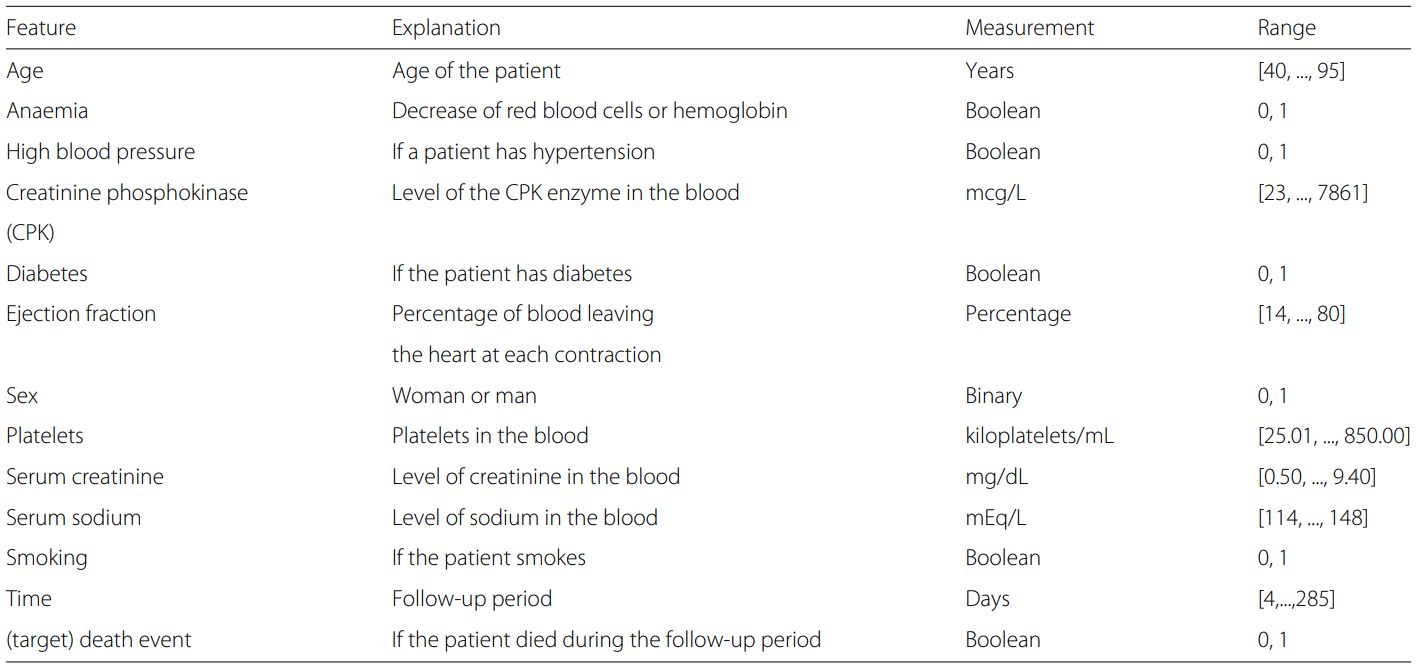

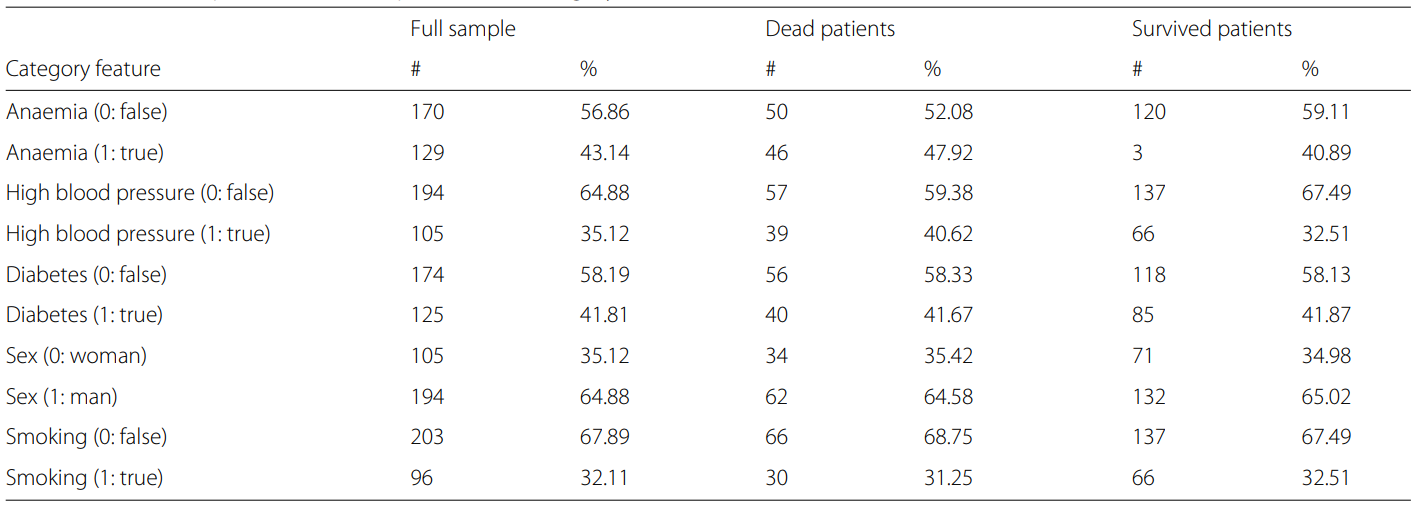

## 2. Import Libraries

In [709]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

In [710]:
import warnings
warnings.filterwarnings("ignore")

## 3. Data Loading

In [711]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [712]:
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [713]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [714]:
data.duplicated().sum()

0

In [715]:
data.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [716]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## 4. Exploratory Data Analysis (EDA)

In [717]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


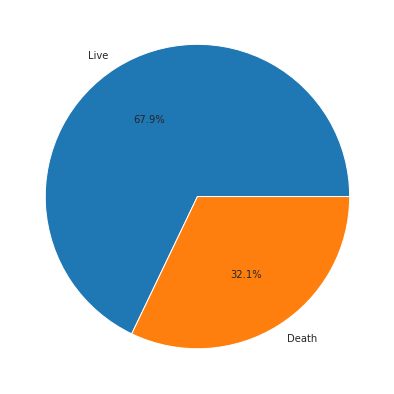

In [718]:
with sns.axes_style('darkgrid'):
  data.groupby('DEATH_EVENT').size().plot(kind='pie', autopct='%1.1f%%', figsize=(10,7), ylabel='', labels=['Live', 'Death']);

dari dataset yang diberikan, sebanyak 32.1 % orang meninggal akibat serangan jantung dan sisanya 67.9 % adalah survived

In [719]:
withs = []
without = []
fac = ['smoking', 'anaemia', 'diabetes', 'high_blood_pressure']
for i in fac:
  a = data.groupby(i)['DEATH_EVENT'].value_counts()[0][1]/(data.groupby(i)['DEATH_EVENT'].value_counts()[0][0] + 
                        data.groupby(i)['DEATH_EVENT'].value_counts()[0][1])
  b = data.groupby(i)['DEATH_EVENT'].value_counts()[1][1]/(data.groupby(i)['DEATH_EVENT'].value_counts()[1][0] + 
                        data.groupby(i)['DEATH_EVENT'].value_counts()[1][1])
  withs.append(b)
  without.append(a)

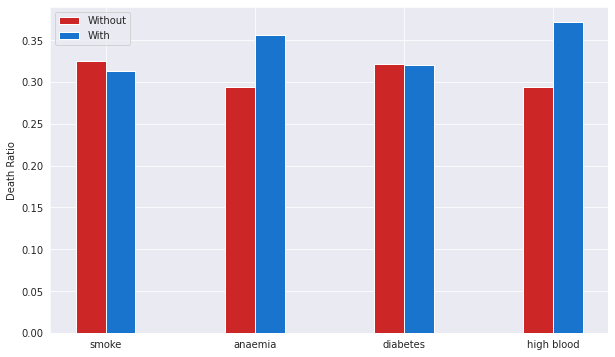

In [720]:
with sns.axes_style('darkgrid'):
  plt.figure(figsize=(10,6))
  bar1 = plt.bar(np.arange(4)-0.1, without, width=0.2, color='#CD2626')
  bar2 = plt.bar(np.arange(4)+0.1, withs, width=0.2, color='#1874CD')
  plt.ylabel('Death Ratio')
  plt.xticks(ticks=[0,1,2,3], labels=['smoke', 'anaemia', 'diabetes', 'high blood']);
  plt.legend(['Without', 'With'])

visual diatas menunjukan rasio kematian untuk masing-masing faktor kesehatan dan kebiasaan,
* pada faktor merokok, rasio kematian akibat gagal jantung antara orang yang merokok dan tidak merokok tidak terpaut terlalu jauh
* pada faktor anaemia, rasio kematian antara pengidap anaemia dengan yang tidak terpaut lumayan jauh yaitu kisaran 0.06. disini menujuka bahwa faktor anaemia menjadi calon resiko yang kuat apakah seseorang akan mengalami gagal jantung atau tidak.
* pada faktor diabetes, rasio antara orang yang diabet dan tidak adalah hampir sama.
* pada faktor tekanan darah, orang dengan tekanan darah tinggi memiliki rasio jumlah rasio kematian lebih tinggi dibanding yang tidak. hal ini menujukan bahwa tekanan darah yang tinggi akan menjadi calon resiko yang kuat penyebab gagal jantung

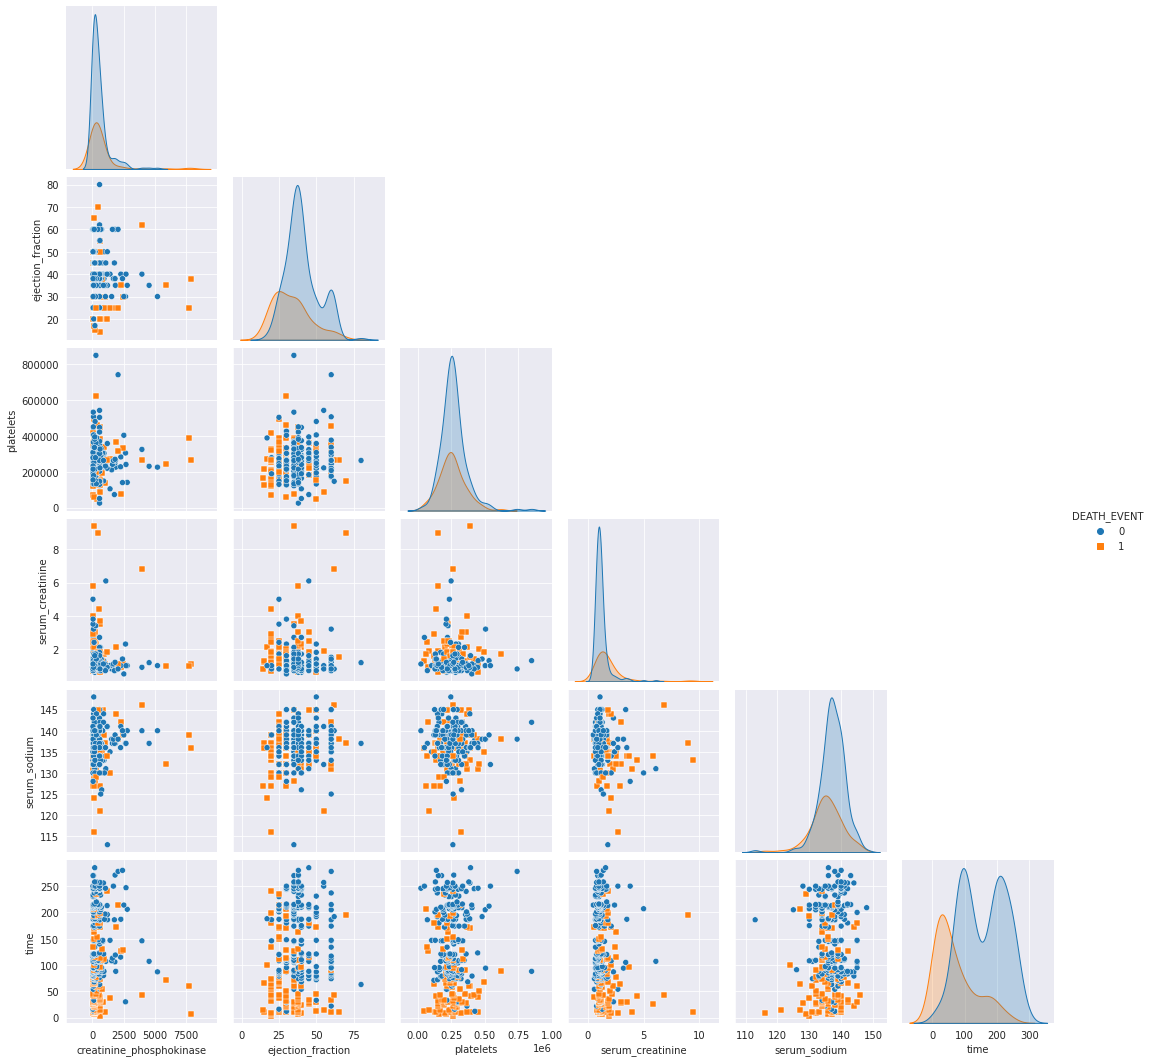

In [721]:
num_cols = ['creatinine_phosphokinase','ejection_fraction','platelets',
            'serum_creatinine', 'serum_sodium','time']
with sns.axes_style(style='darkgrid'):
  sns.pairplot(data, hue='DEATH_EVENT', vars = num_cols, corner=True, markers = ['o', 's']);

pada baris time, dapat dilihat bahwa kelas 0 dan kelas 1 memiliki gaps time yang cukup signifikan. hal ini mengindikasikan bahwa pada kasus serangan jantung yang berujung kematian follow up time cenderung relatif singkat

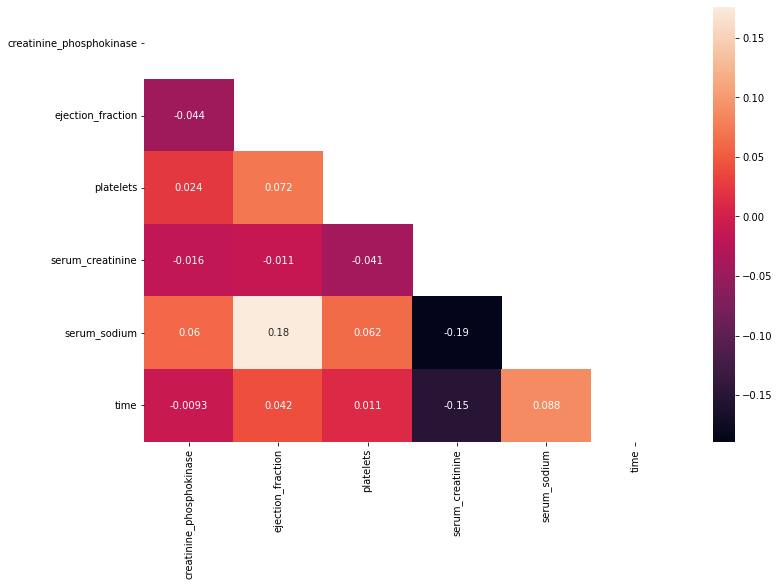

In [722]:
plt.figure(figsize=(12,8))
sns.heatmap(data[num_cols].corr(), annot=True, mask=np.triu(np.ones_like(data[num_cols].corr())));

penulis tidak menemukan korelasi yang berarti anta fitur fitur diatas, sehingga penulis belum bisa menyimpulkan apapun keterkaitan fitur satu dengan yang lain.

## 5. Data Preprocessing

In [723]:
data_inf = data[data.DEATH_EVENT==1].sample(50, random_state=19).append(data[data.DEATH_EVENT==0].sample(50, random_state=98)).sample(15, random_state=14)
data_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
17,45.000,0,582,0,14,0,166000.00,0.80,127,1,0,14,1
3,50.000,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
7,60.000,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
185,60.667,1,104,1,30,0,389000.00,1.50,136,1,0,171,1
251,55.000,0,572,1,35,0,231000.00,0.80,143,0,0,215,0
263,68.000,1,157,1,60,0,208000.00,1.00,140,0,0,237,0
94,58.000,0,144,1,38,1,327000.00,0.70,142,0,0,83,0
24,75.000,0,582,1,30,1,263358.03,1.83,134,0,0,23,1
199,60.000,0,1211,1,35,0,263358.03,1.80,113,1,1,186,0
240,70.000,0,81,1,35,1,533000.00,1.30,139,0,0,212,0


### Transformation, & Outliers

In [724]:
new_data = data.copy()

In [725]:
X = new_data.drop('DEATH_EVENT', axis=1)
y = new_data['DEATH_EVENT']

In [726]:
num_values = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
cat_values = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

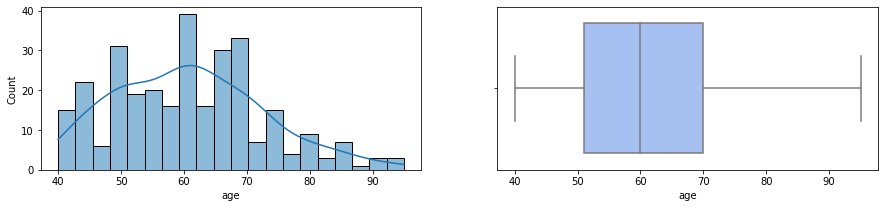

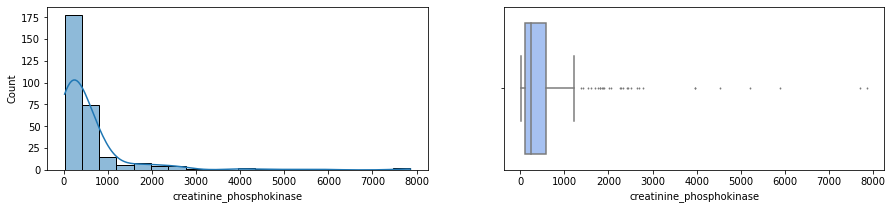

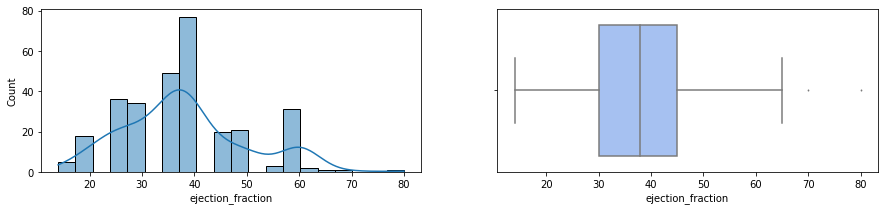

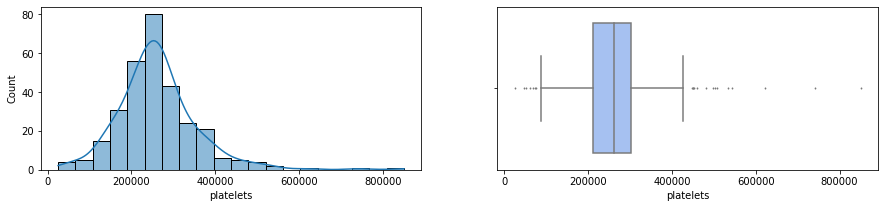

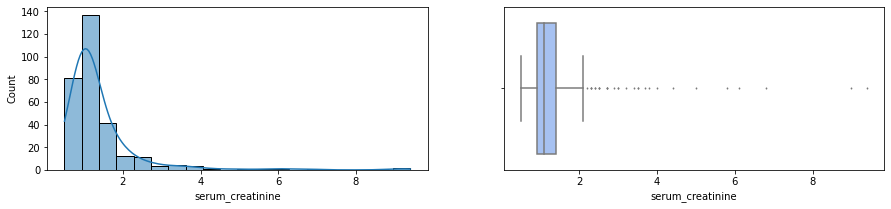

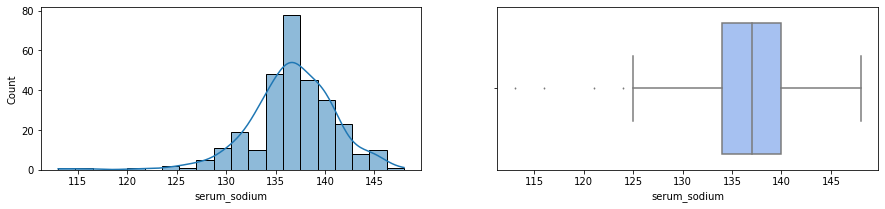

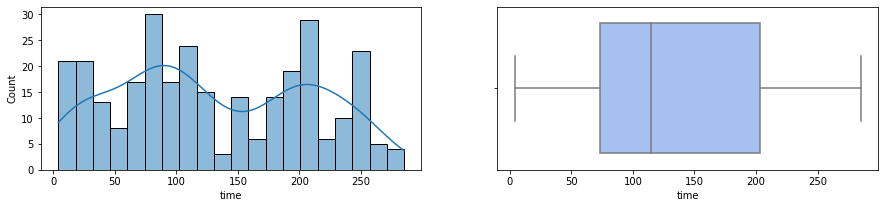

In [727]:
for i in num_values:
  fig, axs = plt.subplots(1,2,figsize=(15, 3))
  sns.histplot(X[i],bins=20, kde=True,ax=axs[0]);
  sns.boxplot(X[i], ax = axs[1], color='#99befd', fliersize=1);

beberapa sebaran data fitur yang skewed akan dilakukan transformasi menggunakn fungsi logaritma dengan harapan distribusinya akan menjadi lebih normal

**Log Transformation :** creatinine_phosphokinase

In [728]:
X['creatinine_phosphokinase'] = np.log(X['creatinine_phosphokinase']+1)

Text(0.5, 1.0, 'Distribusi Setelah Transformasi')

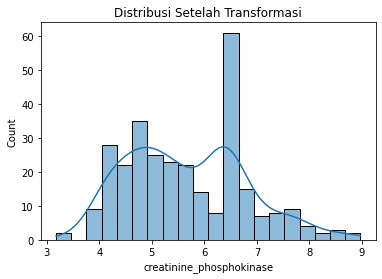

In [729]:
sns.histplot(X['creatinine_phosphokinase'],bins=20, kde=True);
plt.title('Distribusi Setelah Transformasi')

**Log Transformation :** serum_creatinine

In [730]:
X['serum_creatinine'] = np.log(X['serum_creatinine']+1)

Text(0.5, 1.0, 'Distribusi Setelah Transformasi')

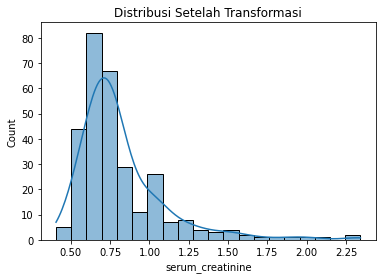

In [731]:
sns.histplot(X['serum_creatinine'],bins=20, kde=True);
plt.title('Distribusi Setelah Transformasi')

**split Train-Test**

In [732]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [733]:
#fungsi deteksi outliers
def iqr(datas, m):
  q3 = np.percentile(datas, 75)
  q1 = np.percentile(datas, 25)
  bb = q1 - (q3-q1)*m #batas bawah
  ba = q3 + (q3-q1)*m #batas atas
  return bb, ba

In [734]:
def winz(coll):
  X_trainval[coll] = np.where(X_trainval[coll]>ba, ba, 
          np.where(X_trainval[coll]<bb, bb, X_trainval[coll]))

discalimer : karena data dalam projek ini sangat terbatas, maka data outliers dari semua kolom akan dihandling dengan cara dilakukan winsorizing.

**Outliers Handling :** creatinine_phosphokinase

In [735]:
bb, ba = iqr(X_trainval.creatinine_phosphokinase, 1.5)
bb, ba

(2.288215341460501, 8.816170293284486)

In [736]:
X_trainval[(X_trainval.creatinine_phosphokinase>ba) | (X_trainval.creatinine_phosphokinase<bb)].shape[0], X_trainval.shape[0]

(2, 239)

In [737]:
#presentase outliers (persen)
X_trainval[(X_trainval.creatinine_phosphokinase>ba) | (X_trainval.creatinine_phosphokinase<bb)].shape[0]/X_trainval.shape[0]*100

0.8368200836820083

In [738]:
#Winsorizing
winz('creatinine_phosphokinase')


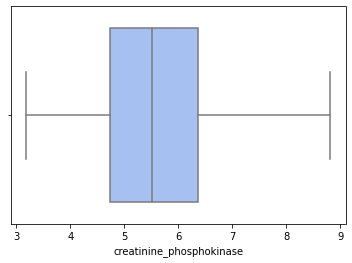

In [739]:
sns.boxplot(X_trainval['creatinine_phosphokinase'], color='#99befd', fliersize=1);

**Outliers Handling :** ejection_fraction

In [740]:
bb, ba = iqr(X_trainval.ejection_fraction, 1.5)
bb, ba

(7.5, 67.5)

In [741]:
#presentase outliers (persen)
X_trainval[(X_trainval.ejection_fraction>ba) | (X_trainval.ejection_fraction<bb)].shape[0]/X_trainval.shape[0]*100

0.0

In [742]:
#Winsorizing
winz('ejection_fraction')

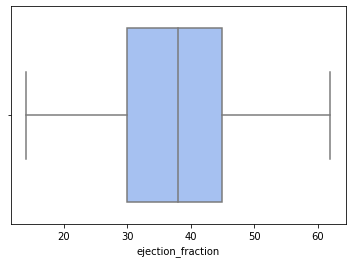

In [743]:
sns.boxplot(X_trainval['ejection_fraction'], color='#99befd', fliersize=1);

**Outliers Handling :** platelets

In [744]:
bb, ba = iqr(X_trainval.platelets, 1.5)
bb, ba

(87500.0, 435500.0)

In [745]:
#presentase outliers (persen)
X_trainval[(X_trainval.platelets>ba) | (X_trainval.platelets<bb)].shape[0]/X_trainval.shape[0]*100

7.112970711297072

In [746]:
#Winsorizing
winz('platelets')

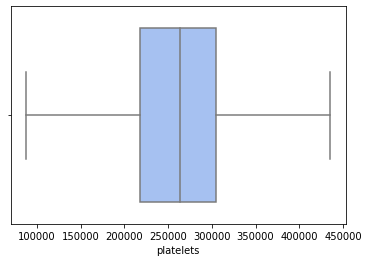

In [747]:
sns.boxplot(X_trainval['platelets'], color='#99befd', fliersize=1);

**Outliers Handling :** serum_creatinine

In [748]:
bb, ba = iqr(X_trainval.serum_creatinine, 1.5)
bb, ba

(0.29143160940013696, 1.2258910141261576)

In [749]:
#presentase outliers (persen)
X_trainval[(X_trainval.serum_creatinine>ba) | (X_trainval.serum_creatinine<bb)].shape[0]/X_trainval.shape[0]*100

7.112970711297072

In [750]:
#Winsorizing
winz('serum_creatinine')

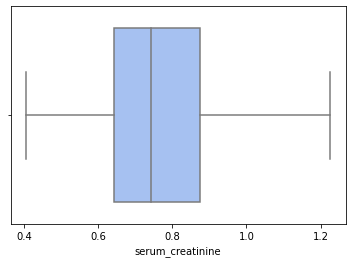

In [751]:
sns.boxplot(X_trainval['serum_creatinine'], color='#99befd', fliersize=1);

**Outliers Handling :** serum_sodium

In [752]:
bb, ba = iqr(X_trainval.serum_sodium, 1.5)
bb, ba

(125.0, 149.0)

In [753]:
#presentase outliers (persen)
X_trainval[(X_trainval.serum_sodium>ba) | (X_trainval.serum_sodium<bb)].shape[0]/X_trainval.shape[0]*100

1.6736401673640167

In [754]:
#Winsorizing
winz('serum_sodium')

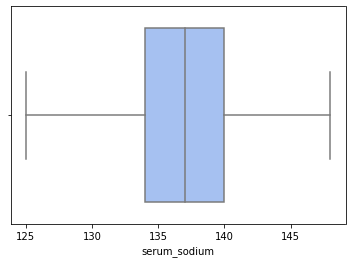

In [755]:
sns.boxplot(X_trainval['serum_sodium'], color='#99befd', fliersize=1);

### Scaling & Encoding

In [756]:
X_trainval_num = X_trainval[num_values]
X_trainval_cat = X_trainval[cat_values]
X_test_num = X_test[num_values]
X_test_cat = X_test[cat_values]

In [757]:
#scaling
scaler_val = StandardScaler()
X_trainval_num_scaled = scaler_val.fit_transform(X_trainval_num)
X_test_num_scaled = scaler_val.transform(X_test_num)

X_trainval_cat_enc = X_trainval_cat.to_numpy()
X_test_cat_enc = X_test_cat.to_numpy()

In [758]:
X_trainval_all = np.column_stack([X_trainval_num_scaled, X_trainval_cat_enc])
X_test_all = np.column_stack([X_test_num_scaled, X_test_cat_enc])

## 6. Model Definition

In [759]:
model_rfc = RandomForestClassifier(random_state=0)
model_ada = AdaBoostClassifier(random_state=0)

## 7. Model Training

In [760]:
model_rfc.fit(X_trainval_all, y_trainval)

RandomForestClassifier(random_state=0)

In [761]:
model_ada.fit(X_trainval_all, y_trainval)

AdaBoostClassifier(random_state=0)

## 8. Model Evaluation

### a. Random Forest

**Base Model**

In [762]:
y_pred_test_rfc = model_rfc.predict(X_test_all)

In [763]:
print(classification_report(y_test, y_pred_test_rfc))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        37
           1       0.94      0.70      0.80        23

    accuracy                           0.87        60
   macro avg       0.89      0.83      0.85        60
weighted avg       0.88      0.87      0.86        60



* f1 score masing2 kelas sudah cukup bagus menadakan bahwa model sudah bisa mengklasifikasikan kelas dengan lumayan baik

**Hyperparameter Tunning**

untuk pemilihan hyperparameter yang sesuai, penulis menggunaka gridsearchCV untuk mencari hyperparameter yang tepat untuk model ini

In [764]:
params_rfc = {
    'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': np.arange(2,9)
}
print(params_rfc)

{'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200], 'criterion': ['gini', 'entropy'], 'min_samples_split': array([2, 3, 4, 5, 6, 7, 8])}


In [765]:
#rfc = RandomForestClassifier(random_state=0)
rfc_grid = GridSearchCV(model_rfc, params_rfc, cv=10, scoring='f1_weighted', return_train_score=True)
rfc_grid.fit(X_trainval_all, y_trainval)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8]),
                         'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200]},
             return_train_score=True, scoring='f1_weighted')

In [766]:
#Melihat parameter terbaik berdasark searchgridCV
print('best params:', rfc_grid.best_params_)
print('best score:', rfc_grid.best_score_)
print('best estimator:', rfc_grid.best_estimator_)

best params: {'criterion': 'gini', 'min_samples_split': 4, 'n_estimators': 25}
best score: 0.8626517998377012
best estimator: RandomForestClassifier(min_samples_split=4, n_estimators=25, random_state=0)


In [767]:
#membuat model baru berdasarkan parameter terbaik
rfc_best = rfc_grid.best_estimator_
print(rfc_best)

RandomForestClassifier(min_samples_split=4, n_estimators=25, random_state=0)


In [768]:
y_pred_test_bestrfc = rfc_best.predict(X_test_all)

In [769]:
#base model
print(classification_report(y_test, y_pred_test_bestrfc))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        37
           1       0.83      0.65      0.73        23

    accuracy                           0.82        60
   macro avg       0.82      0.79      0.80        60
weighted avg       0.82      0.82      0.81        60



In [770]:
#tunned model
print(classification_report(y_test, y_pred_test_rfc))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        37
           1       0.94      0.70      0.80        23

    accuracy                           0.87        60
   macro avg       0.89      0.83      0.85        60
weighted avg       0.88      0.87      0.86        60



jika dibandingkan skor2 diatas yang merupakan model sebelum dan sesudah dilakukan tunning, teryata setelah digunakan untuk memprediksi data tes, model sebelum di tunning menujukan perform yang lebih bagus dibandingkan sesudah di tunning walaupun keterpautanya tidak begitu jauh.

### b. Boosting (AdaBoost)

**Base Model**

In [771]:
y_pred_test_ada = model_ada.predict(X_test_all)

In [772]:
print(classification_report(y_test, y_pred_test_ada))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        37
           1       0.89      0.70      0.78        23

    accuracy                           0.85        60
   macro avg       0.86      0.82      0.83        60
weighted avg       0.85      0.85      0.85        60



* jika dibandingkan dengan score pada model random forest, model adaboost cenderung lmemiliki skore lebih rendah. namun tetap f1 score masing2 kelas sudah cukup bagus menadakan bahwa model sudah bisa mengklasifikasikan kelas dengan lumayan baik

**Hyperparameter Tunning**

untuk pemilihan hyperparameter yang sesuai, penulis menggunaka gridsearchCV untuk mencari hyperparameter yang tepat untuk model ini

In [773]:
params_ada = {
    'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200],
    'learning_rate': [0.2, 0.4, 0.6, 0.8, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}
print(params_ada)

{'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200], 'learning_rate': [0.2, 0.4, 0.6, 0.8, 1], 'algorithm': ['SAMME', 'SAMME.R']}


In [774]:
#ada = AdaBoostClassifier(random_state=0)
ada_grid = GridSearchCV(model_ada, params_ada, cv=10, scoring='f1_weighted', return_train_score=True)
ada_grid.fit(X_trainval_all, y_trainval)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=0),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.2, 0.4, 0.6, 0.8, 1],
                         'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200]},
             return_train_score=True, scoring='f1_weighted')

In [775]:
#Melihat parameter terbaik berdasark searchgridCV
print('best params:', ada_grid.best_params_)
print('best score:', ada_grid.best_score_)
print('best estimator:', ada_grid.best_estimator_)

best params: {'algorithm': 'SAMME', 'learning_rate': 0.6, 'n_estimators': 75}
best score: 0.8621115740409218
best estimator: AdaBoostClassifier(algorithm='SAMME', learning_rate=0.6, n_estimators=75,
                   random_state=0)


In [776]:
#membuat model baru berdasarkan parameter terbaik
ada_best = ada_grid.best_estimator_
print(ada_best)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.6, n_estimators=75,
                   random_state=0)


In [777]:
y_pred_test_bestada = ada_best.predict(X_test_all)

In [778]:
print(classification_report(y_test, y_pred_test_bestada))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88        37
           1       0.93      0.61      0.74        23

    accuracy                           0.83        60
   macro avg       0.87      0.79      0.81        60
weighted avg       0.85      0.83      0.82        60



In [779]:
print(classification_report(y_test, y_pred_test_ada))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        37
           1       0.89      0.70      0.78        23

    accuracy                           0.85        60
   macro avg       0.86      0.82      0.83        60
weighted avg       0.85      0.85      0.85        60



sama seperti model random forest sebelumnya, jika dibandingkan skor2 diatas yang merupakan model sebelum dan sesudah dilakukan tunning, teryata setelah digunakan untuk memprediksi data tes, model sebelum di tunning menujukan perform yang lebih bagus dibandingkan sesudah di tunning walaupun keterpautanya tidak begitu jauh.

## 9. Model Inference

In [780]:
data_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
17,45.000,0,582,0,14,0,166000.00,0.80,127,1,0,14,1
3,50.000,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
7,60.000,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
185,60.667,1,104,1,30,0,389000.00,1.50,136,1,0,171,1
251,55.000,0,572,1,35,0,231000.00,0.80,143,0,0,215,0
263,68.000,1,157,1,60,0,208000.00,1.00,140,0,0,237,0
94,58.000,0,144,1,38,1,327000.00,0.70,142,0,0,83,0
24,75.000,0,582,1,30,1,263358.03,1.83,134,0,0,23,1
199,60.000,0,1211,1,35,0,263358.03,1.80,113,1,1,186,0
240,70.000,0,81,1,35,1,533000.00,1.30,139,0,0,212,0


In [781]:
X_inf = data_inf.drop('DEATH_EVENT', axis=1)
y_inf = data_inf.DEATH_EVENT

In [782]:
X_inf['creatinine_phosphokinase'] = np.log(X_inf['creatinine_phosphokinase']+1)
X_inf['serum_creatinine'] = np.log(X_inf['serum_creatinine']+1)

In [783]:
X_inf_scaled = scaler_val.transform(X_inf[num_values])

X_inf_enc = X_inf[cat_values].to_numpy()

X_inf_all = np.column_stack([X_inf_scaled, X_inf_enc])

**Random Forest**

In [784]:
y_inf_pred_rfc = model_rfc.predict(X_inf_all)

In [785]:
y_inf_pred_bestrfc = rfc_best.predict(X_inf_all)

In [786]:
#dataframe hasil prediksi vs hasil yang sebenarnya dari data inference
realvspred_rfc = pd.DataFrame({'real': list(y_inf), 'prediction (No Tunned)': list(y_inf_pred_rfc),
                               'prediction (Tunned)': list(y_inf_pred_bestrfc)})
realvspred_rfc

,real,prediction (No Tunned),prediction (Tunned)
0,1,1,1
1,1,1,1
2,1,1,0
3,1,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,1
8,0,0,0
9,0,0,0


**AdaBoost**

In [787]:
y_inf_pred_ada = model_ada.predict(X_inf_all)

In [788]:
y_inf_pred_bestada = ada_best.predict(X_inf_all)

In [789]:
#dataframe hasil prediksi vs hasil yang sebenarnya dari data inference
realvspred_ada = pd.DataFrame({'real': list(y_inf), 'prediction (No Tunned)': list(y_inf_pred_ada),
                               'prediction (Tunned)': list(y_inf_pred_bestada)})
realvspred_ada

,real,prediction (No Tunned),prediction (Tunned)
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,0
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,1
8,0,0,0
9,0,0,0


## 10. Kesimpulan

* kedua base model baik itu random forest maupun adaboost secara umum memilik score keseluruhan yang bagus yaitu dengan f1 score diangka 0.8 hingga 0.9
* setelah dilakukan hyperparameter tunning dengan detail berikut :
<br>
RandomForestClassifier(min_samples_split=4, n_estimators=25) 
<br>
AdaBoostClassifier(algorithm='SAMME', learning_rate=0.6, n_estimators=75)
<br>
ternyata untuk kedual model diatas masih belum dapat perform dengan baik hal ini dapat dilihat dengan perbandingan skornya dengan model base dan juga kemampuan prediksinya pada model inference
